<a href="https://colab.research.google.com/github/mathgod27/NumericalAnalysisProjects/blob/main/NewtonMethod_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the libraries
import numpy as np
import math

## Implement its gradient vector and its Hessian matrix, which is an exercise presented on Slide 45 of Topic 3.2
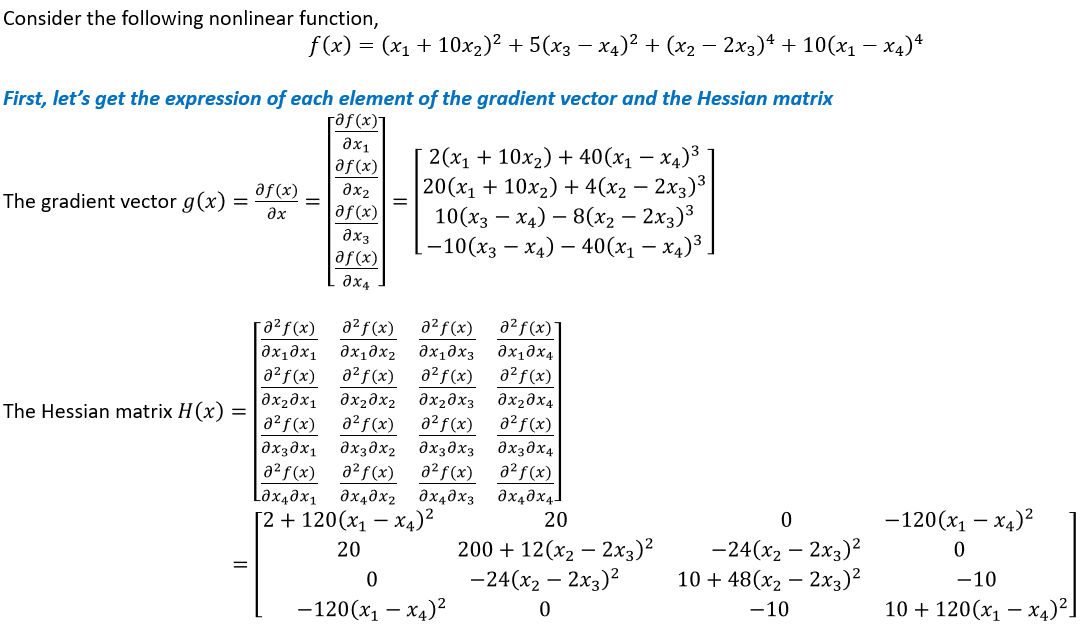

In [ ]:
## the function returns the Gradient vector at the input vector x_i
## note: the expression of each element in the Gradient vector is hard-coded based on the formula presented above, which is also given on Slide 45 of Topic 3.2
def getGradientVector(x_i):
  g = np.zeros((4,1))
  g[0] = 2 * (x_i[0]+10*x_i[1]) + 40 *(x_i[0]-x_i[3])*(x_i[0]-x_i[3])*(x_i[0]-x_i[3])
  g[1] = 20 * (x_i[0]+10*x_i[1]) + 4 * (x_i[1]-2*x_i[2])*(x_i[1]-2*x_i[2])*(x_i[1]-2*x_i[2])
  g[2] = 10 * (x_i[2]-x_i[3]) - 8 * (x_i[1]-2*x_i[2])*(x_i[1]-2*x_i[2])*(x_i[1]-2*x_i[2])
  g[3] = -10 * (x_i[2]-x_i[3]) - 40 *(x_i[0]-x_i[3])*(x_i[0]-x_i[3])*(x_i[0]-x_i[3])
  return g

# the function returns the norm of an input vector
def getNorm(v):
  return math.sqrt(v[0]*v[0]+v[1]*v[1]+v[2]*v[2]+v[3]*v[3])

## the function returns the Hessian matrix at the vector x_i
## note: the expression of each element in the Hessian matrix is hard-coded based on the formula presented above, which is also given on Slide 45 of Topic 3.2
def getHessianMatrix(x_i):
  H = np.zeros((4,4))

  H[0, 0] = 2 + 120*(x_i[0]-x_i[3])*(x_i[0]-x_i[3])
  H[0, 1] = 20
  H[0, 2] = 0
  H[0, 3] = -120*(x_i[0]-x_i[3])*(x_i[0]-x_i[3])

  H[1, 0] = 20
  H[1, 1] = 200 + 12*(x_i[1]-2*x_i[2])*(x_i[1]-2*x_i[2])
  H[1, 2] = -24*(x_i[1]-2*x_i[2])*(x_i[1]-2*x_i[2])
  H[1, 3] = 0

  H[2, 0] = 0
  H[2, 1] = -24*(x_i[1]-2*x_i[2])*(x_i[1]-2*x_i[2])
  H[2, 2] = 10 + 48*(x_i[1]-2*x_i[2])*(x_i[1]-2*x_i[2])
  H[2, 3] = -10

  H[3, 0] = -120*(x_i[0]-x_i[3])*(x_i[0]-x_i[3])
  H[3, 1] = 0
  H[3, 2] = -10
  H[3, 3] = 10 + 120*(x_i[0]-x_i[3])*(x_i[0]-x_i[3])
  return H

## Perform the Newton's Method for minimizing the nonlinear function

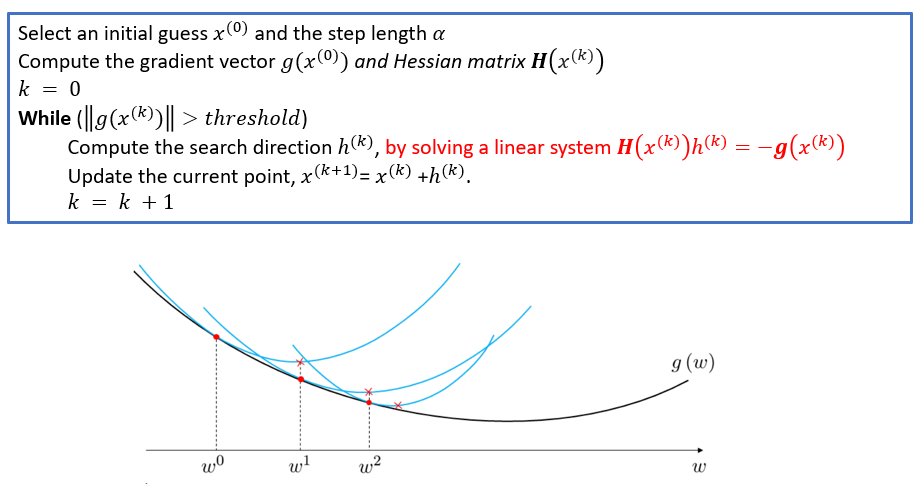


In [ ]:
## set an initial guess
x_0 = np.array([[3], [-1], [0], [1]])
print(f"--The initial guess x0: ")
print(x_0)

## set a threshold value for getting a good solution
thresh = 0.01

x_i = x_0
count = 0
while True:
  print('****************************************************')
  print(f'--At iteration: {count}')

  ## compute the gradient vector at x_i
  g = getGradientVector(x_i)
  print(f"--The gradient vector g(x_{count}): ")
  print(g)

  ## compute the norm of the gradient vector at x_i
  normOfGradient = getNorm(g)
  print(f"--The norm of the gradient vector |g(x_{count})|: {normOfGradient}")

  ## check if converged; if true, then stop; continue otherwise
  if normOfGradient <= thresh:
    break

  ## compute the Hessian matrix at x_i
  H = getHessianMatrix(x_i)
  print(f"--The Hessian matrix H(x_{count}): ")
  print(H)

  ## solve the linear system  Hh=-g
  h_i = np.linalg.solve(H, -1*g)
  print(f"--The h vector h_{count}: ")
  print(h_i)

  ## get the new solution point
  x_i_plus1 = x_i + h_i
  print(f"--The solution vector x_{count+1}: ")
  print(x_i_plus1)

  x_i = x_i_plus1
  count = count + 1
  print()

--The initial guess x0: 
[[ 3]
 [-1]
 [ 0]
 [ 1]]
****************************************************
--At iteration: 0
--The gradient vector g(x_0): 
[[ 306.]
 [-144.]
 [  -2.]
 [-310.]]
--The norm of the gradient vector |g(x_0)|: 458.77663410422286
--The Hessian matrix H(x_0): 
[[ 482.   20.    0. -480.]
 [  20.  212.  -24.    0.]
 [   0.  -24.   58.  -10.]
 [-480.    0.  -10.  490.]]
--The h vector h_0: 
[[-1.41269841]
 [ 0.84126984]
 [ 0.25396825]
 [-0.74603175]]
--The solution vector x_1: 
[[ 1.58730159]
 [-0.15873016]
 [ 0.25396825]
 [ 0.25396825]]

****************************************************
--At iteration: 1
--The gradient vector g(x_1): 
[[ 94.81481481]
 [ -1.18518519]
 [  2.37037037]
 [-94.81481481]]
--The norm of the gradient vector |g(x_1)|: 134.1145836080146
--The Hessian matrix H(x_1): 
[[ 215.33333333   20.            0.         -213.33333333]
 [  20.          205.33333333  -10.66666667    0.        ]
 [   0.          -10.66666667   31.33333333  -10.        ]
 